<a href="https://colab.research.google.com/github/zahraDehghanian97/sharpening_filtering/blob/master/BioMedical_Image_Analysis_Hw2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Please insert your full name:** Zahra Dehghanian

**And your student number:** 401300417



---



# Q1 (Sharpening)


## Import dependencies:

In [68]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import numpy as np
from math import exp,sqrt
import timeit

## Read the image and use four different methods to sharpen the image. Briefly discuss your main approach in each of the methods.

You are **allowed** to use any kind of different methods. 

chosen one are listed as bellow :

1) unsharp mask filter

2) second deriative

3) unsharp mask in frequency domain

4) circular highpass filter in frequency domain

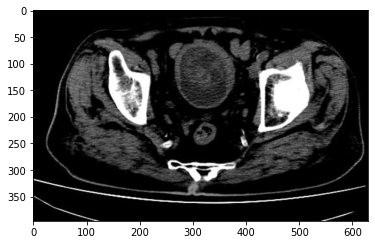

In [69]:
original_image = plt.imread('image1.jpeg',0)
# Convert to grayscale
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(original_image,cmap= 'gray')
time = []
name = []

## First Method

unsharp masking 

sharp image = 2image - g X image 

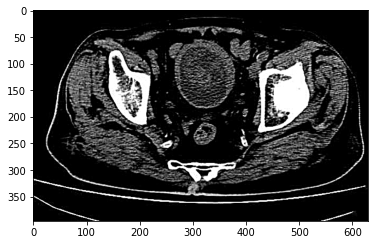

In [70]:
start = timeit.default_timer()
gaussian = cv2.GaussianBlur(original_image, (0, 0), 2.0)
sharp_image_1 = cv2.addWeighted(original_image, 4.0, gaussian, -3.0, 0)
time.append(timeit.default_timer()-start)
name.append("unsharp masking")
plt.imshow(sharp_image_1,cmap='gray')

## Second Method

second deriative 

sharp_image = image - a X Laplacian(image)





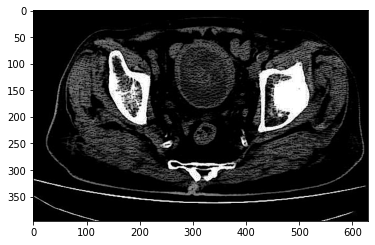

In [71]:
start = timeit.default_timer()
# Calculate the Laplacian
lap = cv2.Laplacian(original_image,cv2.CV_8U,ksize= 3)
# Calculate the sharpened image
sharp_image_2 = cv2.addWeighted(original_image, 1.0, lap, -1.0, 0)
time.append(timeit.default_timer()-start)
name.append("laplace")
#show data 
plt.imshow(sharp_image_2,cmap='gray')

## Third Method

unsharp mask in frequency domain
sharp_image = image + f-1 (gaussian kernel)

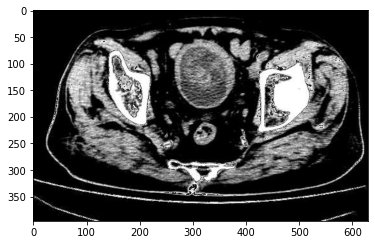

In [72]:
def gaussian_kernel(shape, mean, var):
    coors = [range(shape[d]) for d in range(len(shape))]
    k = np.zeros(shape=shape)
    cartesian_product = [[]]
    for coor in coors:
        cartesian_product = [x + [y] for x in cartesian_product for y in coor]
    for c in cartesian_product:
        s = 0
        for cc, m in zip(c,mean):
            s += (cc - m)**2
        k[tuple(c)] = np.exp(-s/(2*var))
    return k

start = timeit.default_timer()
# perform FFT
fft_image = np.fft.fftshift(np.fft.fft2(original_image))
# center spectrum for high pass
HighPassCenter = fft_image * gaussian_kernel(shape=original_image.shape,mean=(1,1),var=100.0)
# reverse FFT 
inverse_HighPass = np.fft.ifft2(np.fft.ifftshift(HighPassCenter))
# add filter to original image
sharp_image_3 = 2*original_image-np.abs(inverse_HighPass)
time.append(timeit.default_timer()-start)
name.append("unsharp mask freq. domain")
plt.imshow(sharp_image_3,cmap="gray")


## Forth Method

use circular highpass filter
sharp_image = image + a* f-1 (circular highpass filter)

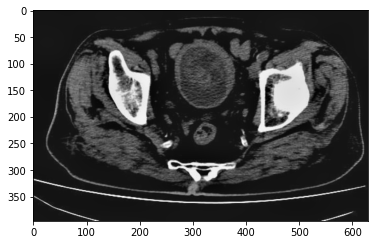

In [73]:
def circular_kernel(r,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
          if distance((y,x),center)<r :
            base[y,x] = 1
    return base

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

start = timeit.default_timer()
r = 5
# perform FFT
fft_image = np.fft.fftshift(np.fft.fft2(original_image))
# center spectrum for high pass
HighPassCenter = fft_image * circular_kernel(r,original_image.shape)
# reverse FFT 
inverse_HighPass = np.fft.ifft2(np.fft.ifftshift(HighPassCenter))
# add filter to original image
sharp_image_4 = 3.5* original_image-0.5* np.real(inverse_HighPass)
time.append(timeit.default_timer()-start)
name.append("circular filter")
plt.imshow(sharp_image_4,cmap="gray")


### Compare different methods quality and time.

compare time

In [74]:
for i in range(4):
  print(str(name[i])+ " : "+str(time[i]))

unsharp masking : 0.004182215000582801
laplace : 0.001108995999857143
unsharp mask freq. domain : 1.1977344259994425
circular filter : 0.1363064300003316


از نظر مقایسه زمانی مطابق انتظار، روش هایی که نیاز به محاسبه فوریه تصویر دارند زمان بیشتری استفاده کرده اند تا روش هایی که مستقیما روی تصویر اعمال می شوند.

compare quality

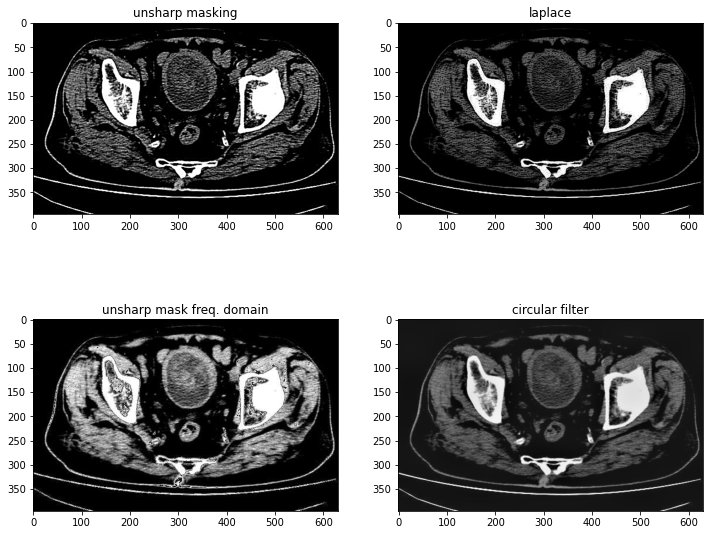

In [75]:
plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(sharp_image_1,cmap="gray")
plt.title(name[0])
plt.subplot(222)
plt.imshow(sharp_image_2,cmap="gray")
plt.title(name[1])
plt.subplot(223)
plt.imshow(sharp_image_3,cmap="gray")
plt.title(name[2])
plt.subplot(224)
plt.imshow(sharp_image_4,cmap="gray")
plt.title(name[3])
plt.show()

بنظر می رسد بهترین خروجی متعلق به روش اول می باشد و پس از آن روش سوم توانسته کیفیت قابل قبولی تولید کند. البته تکنیک لاپلاس همرزولوشن مناسبی ایجاد کرده است و بدترین عملکرد متعلق به فیلتر بالاگذر دایره ای بوده است.

# Q2(Filtering)

## Import dependencies:

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import  rgb2gray

## Section 1

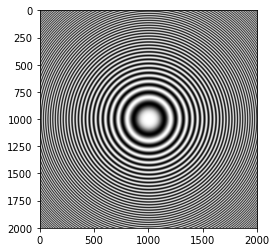

In [78]:
# loading image
img = cv2.imread('image2.png')
img = rgb2gray(img)
plt.imshow(img,cmap = 'gray')

#### Sobel

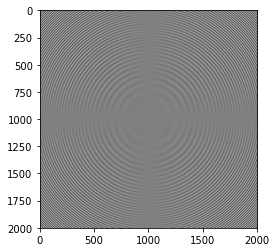

In [79]:
sobel = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)  
plt.imsave("q2_res01.png",sobel)
plt.imshow(sobel,cmap = 'gray')

#### gaussian

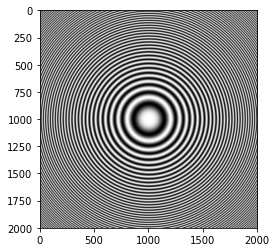

In [82]:
gaussian = cv2.GaussianBlur(img,(3,3),0)
cv2.imwrite("q2_res02.png",gaussian)
plt.imshow(gaussian,cmap = 'gray')

#### laplacian

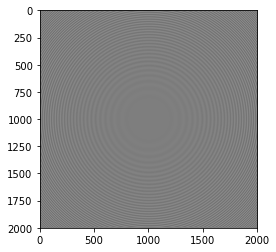

In [83]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
cv2.imwrite("q2_res03.png",laplacian)
plt.imshow(laplacian,cmap = 'gray')

 بنظر میرسد هر دو فیلتر سوبل و لاپلاس به استخراج لبه ها در تصویر منجر میشود. اما فیلتر سوبل به طور مشخص بخش هایی از تصویر که روی محور اصلی قرار دارند را حذف میکند. فیلتر گوسی اما بنظر می رسد که دقیقا عکس دو فیلتر قبلی عمل میکند و لبه هارا از بین می برد و یک تصویر مات شده خروجی می دهد. 

## Section 2

Is fourier transform of a gaussian distribution, also gaussian?

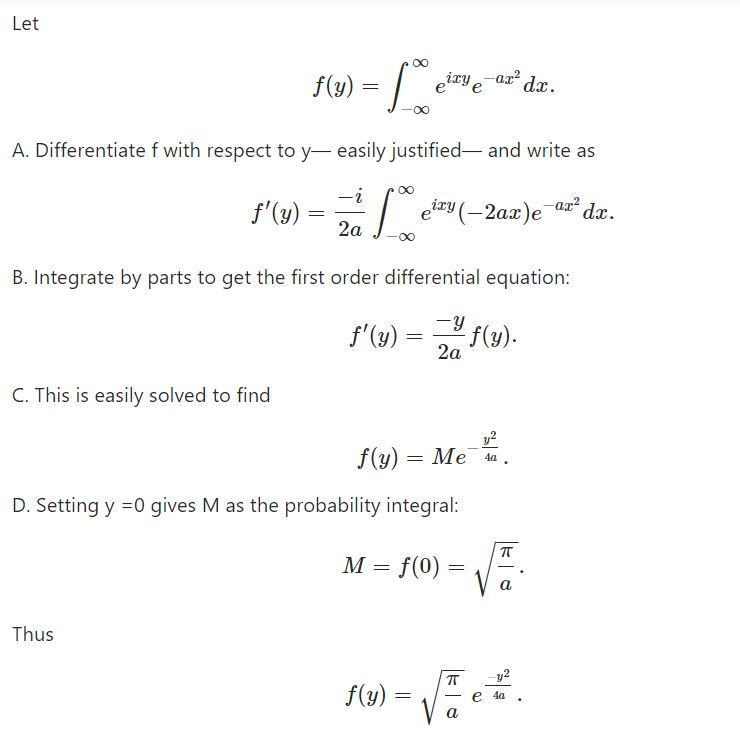

link resource :
https://www.quora.com/What-is-the-fourier-transform-of-a-Gaussian-function

show fourier transform of image

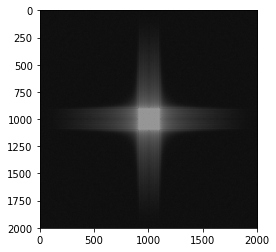

In [84]:
fft_image = np.fft.fftshift(np.fft.fft2(img))
cv2.imwrite("q2_res04.png",np.log(abs(fft_image)))
plt.imshow(np.log(1+abs(fft_image)),cmap='gray')

multiply gaussian filter in fourier transform of image

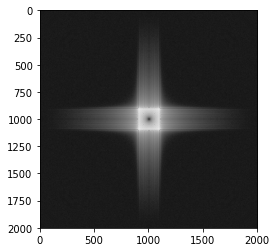

In [85]:
def gaussian(sigma,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(sigma**2))))
    return base

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

sigma = 100
g = gaussian(sigma,img.shape)
g_image = fft_image * g
cv2.imwrite("q2_res05.png",np.log(abs(g_image)))
plt.imshow(np.log(1+abs(g_image)),cmap='gray')


complement gaussian

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


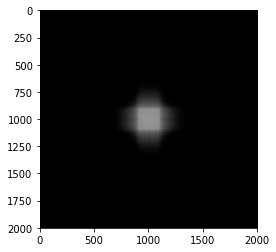

In [86]:
cg_image = fft_image * (1-g)
cv2.imwrite("q2_res06.png",np.log(abs(cg_image)))
plt.imshow(np.log(1+abs(cg_image)),cmap='gray')

inverse gaussian

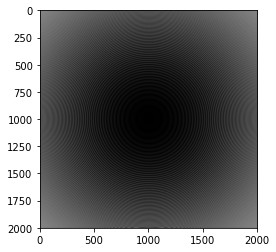

In [87]:
inverse_g_image = np.fft.ifft2(np.fft.ifftshift(g_image))
cv2.imwrite("q2_res7.png",abs(inverse_g_image))
plt.imshow(abs(inverse_g_image),cmap='gray')

inverse complement gaussian

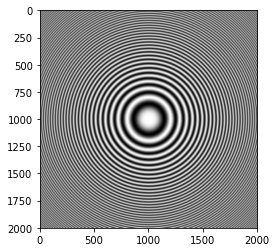

In [88]:
inverse_cg_image = np.fft.ifft2(np.fft.ifftshift(cg_image))
cv2.imwrite("q2_res8.png",abs(inverse_cg_image))
plt.imshow(abs(inverse_cg_image),cmap='gray')

multiply square filter in fourier transform of image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


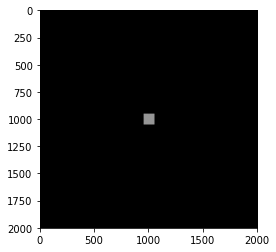

In [89]:
def square(imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
          if abs(y-center[0])<rows/40 and abs(x-center[1])<cols/40 :
            base[y,x] = 1
    return base

s = square(img.shape)
s_image = fft_image * s
cv2.imwrite("q2_res09.png",np.log(abs(s_image)))
plt.imshow(np.log(1+abs(s_image)),cmap='gray')


complement square

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


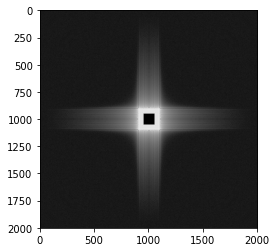

In [90]:
cs_image = fft_image * (1-s)
cv2.imwrite("q2_res10.png",np.log(abs(cs_image)))
plt.imshow(np.log(1+abs(cs_image)),cmap='gray')

inverse gaussian

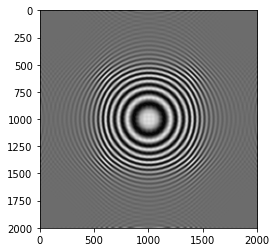

In [91]:
inverse_s_image = np.fft.ifft2(np.fft.ifftshift(s_image))
cv2.imwrite("q2_res11.png",abs(inverse_s_image))
plt.imshow(abs(inverse_s_image),cmap='gray')

inverse complement gaussian

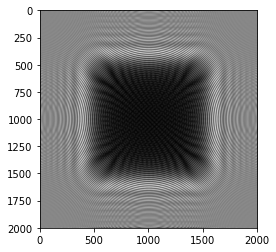

In [92]:
inverse_cs_image = np.fft.ifft2(np.fft.ifftshift(cs_image))
cv2.imwrite("q2_res12.png",abs(inverse_cs_image))
plt.imshow(abs(inverse_cs_image),cmap='gray')

## Compare and contrast results

بنظر می رسد که به کمک تابع گوسی توانتیم نویز های بالا که دوایر مجاور اضلاع هستن را کشف کنیم و با استفاده از مکمل ان سیگنال اصلی موجود در تصویر را یافتیم

در سیگنال مربعی با انتخاب بخش مرکزی تصویر و برگرداندن آن تقریبا بخش مرکزیتصویر اصلی را به طور کامل بازسازی کردیم و در حالت معکوس به بخش های نزدیک به اضلاع شکل تمرکز داشتیم

علت وجود مربع در تصویر به دلیل فرایند فوریه معکوس روی فیلتر مربعس می باشد. در واقع از درس سیگنال به خاطر داریم که فوریه معکوس تابع مستطیلی تابع sinc می باشد

پس وقتی که از تصویر بالا فوریه معکوس میگیریم به دلیل ضرب تابع مربعی منتظر هستیم که تابع تکرارشونده سینک یک الگوی تکراری در تصویر تولید کند .


